In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
items = pd.read_csv("items.csv")
sales = pd.read_csv("sales_train.csv")
categories = pd.read_csv("item_categories.csv")
shops = pd.read_csv("shops.csv")

In [3]:
shops.sample(7)

,shop_name,shop_id
50,"Тюмень ТЦ ""Гудвин""",50
56,"Чехов ТРЦ ""Карнавал""",56
45,"Самара ТЦ ""ПаркХаус""",45
43,"СПб ТК ""Сенная""",43
46,"Сергиев Посад ТЦ ""7Я""",46
11,Жуковский ул. Чкалова 39м²,11
20,"Москва ""Распродажа""",20


In [4]:
categories.sample(7) 

,item_category_name,item_category_id
74,Программы - MAC (Цифра),74
8,Билеты (Цифра),8
48,Книги - Компьютерная литература,48
82,Чистые носители (штучные),82
69,Подарки - Сувениры,69
25,Игры - Аксессуары для игр,25
44,Книги - Аудиокниги (Цифра),44


In [5]:
items.sample(7)
len(items)

22170

In [6]:
sales.sample(7)
print(len(sales))

2935849


In [7]:
def getSalesForShop(id):
    sales_shop = sales[sales["shop_id"] == id]
    sold_each_month = sales_shop.groupby(by="date_block_num", dropna=True).sum()
    return sold_each_month['item_cnt_day']

def getSalesForItem(id):
    sales_item = sales[sales["item_id"] == id]
    sold_each_month = sales_item.groupby(by="date_block_num", dropna=True).sum()
    return sold_each_month['item_cnt_day']

def getSalesForShopAndItem(shop_id, item_id):
    sales_shop_item = sales[(sales["shop_id"] == shop_id) & (sales["item_id"] == item_id)]
    sold_each_month = sales_shop_item.groupby(by="date_block_num", dropna=True).sum()
    return sold_each_month['item_cnt_day']

def getSalesForItemCategory(category_id):
    merged = pd.merge(sales, items, on='item_id', how='inner')
    merged_new = merged[(merged["item_category_id"] == category_id)]
    sold_each_month = merged_new.groupby(by="date_block_num", dropna=True).sum()
    return sold_each_month['item_cnt_day']

def getSalesForShopAndItemCategory(shop_id, category_id):
    merged = pd.merge(sales, items, on='item_id', how='inner')
    merged_new = merged[(merged["shop_id"] == shop_id) & (merged["item_category_id"] == category_id)]
    sold_each_month = merged_new.groupby(by="date_block_num", dropna=True).sum()
    return sold_each_month['item_cnt_day']

def getTotalSales():
    sales_item = sales
    sold_each_month = sales_item.groupby(by="date_block_num", dropna=True).sum()
    return sold_each_month['item_cnt_day']

    

<BarContainer object of 34 artists>

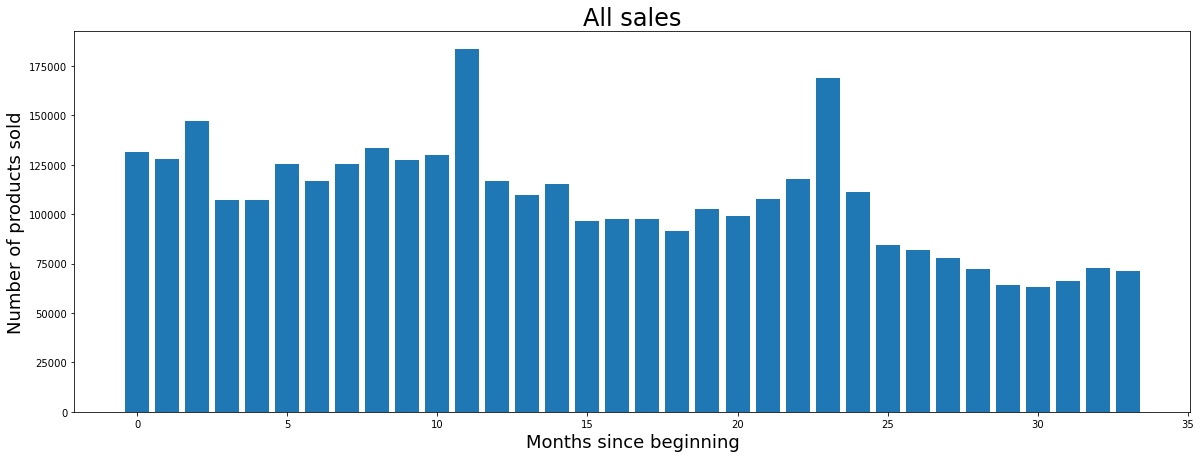

In [8]:
sales_data = getTotalSales()
x = range(0,len(sales_data))
fig, ax = plt.subplots(figsize=(20,7))
ax.set_title("All sales", fontsize=24)
ax.set_ylabel("Number of products sold", fontsize=18)
ax.set_xlabel("Months since beginning", fontsize=18)
ax.bar(x, sales_data)


<BarContainer object of 34 artists>

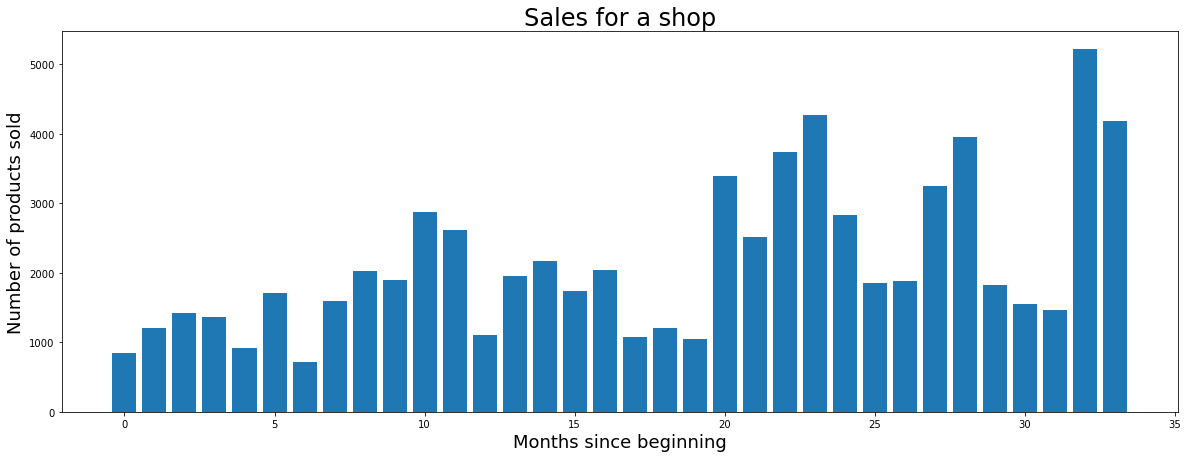

In [9]:
sales_data = getSalesForShop(12)
x = range(0,len(sales_data))
fig, ax = plt.subplots(figsize=(20,7))
ax.set_title("Sales for a shop", fontsize=24)
ax.set_ylabel("Number of products sold", fontsize=18)
ax.set_xlabel("Months since beginning", fontsize=18)
ax.bar(x, sales_data)

<BarContainer object of 34 artists>

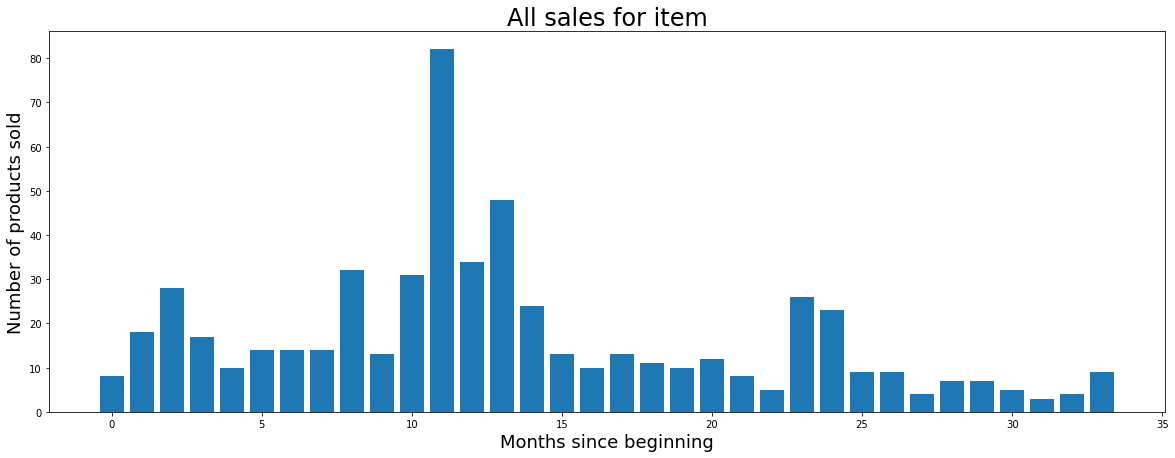

In [10]:
sales_data = getSalesForItem(1010)
x = range(0,len(sales_data))
fig, ax = plt.subplots(figsize=(20,7))
ax.set_title("All sales for item", fontsize=24)
ax.set_ylabel("Number of products sold", fontsize=18)
ax.set_xlabel("Months since beginning", fontsize=18)
ax.bar(x, sales_data)

<BarContainer object of 34 artists>

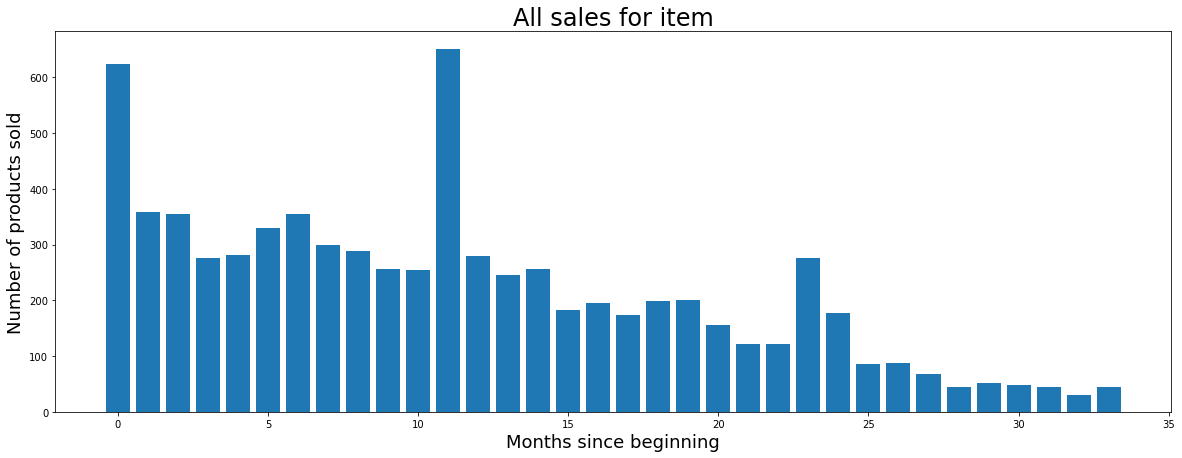

In [11]:
sales_data = getSalesForItemCategory(5)
x = range(0,len(sales_data))
fig, ax = plt.subplots(figsize=(20,7))
ax.set_title("All sales for item", fontsize=24)
ax.set_ylabel("Number of products sold", fontsize=18)
ax.set_xlabel("Months since beginning", fontsize=18)
ax.bar(x, sales_data)

<BarContainer object of 25 artists>

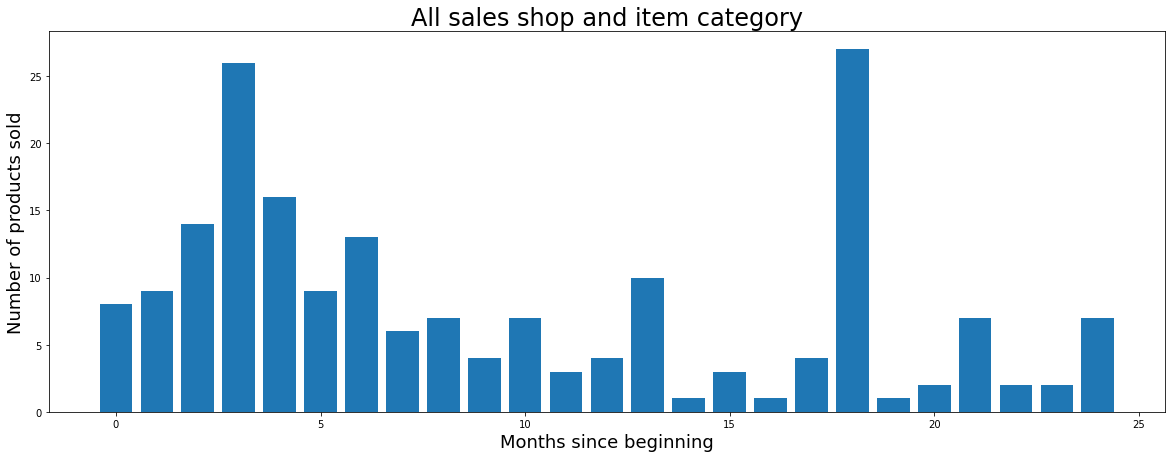

In [12]:
sales_data = getSalesForShopAndItemCategory(15, 25)
x = range(0,len(sales_data))
fig, ax = plt.subplots(figsize=(20,7))
ax.set_title("All sales shop and item category", fontsize=24)
ax.set_ylabel("Number of products sold", fontsize=18)
ax.set_xlabel("Months since beginning", fontsize=18)
ax.bar(x, sales_data)

date_block_num
0     2.0
1     2.0
3     4.0
5     1.0
6     1.0
7     1.0
13    3.0
14    1.0
17    1.0
20    1.0
23    1.0
Name: item_cnt_day, dtype: float64


<BarContainer object of 11 artists>

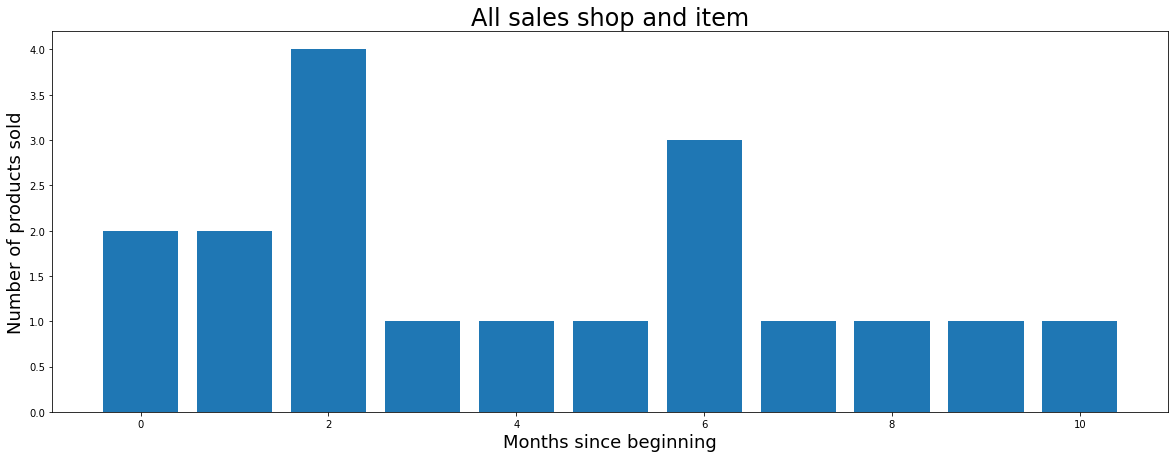

In [13]:

sales_data = getSalesForShopAndItem(15, 1025)
print(sales_data)
x = range(0,len(sales_data))
fig, ax = plt.subplots(figsize=(20,7))
ax.set_title("All sales shop and item", fontsize=24)
ax.set_ylabel("Number of products sold", fontsize=18)
ax.set_xlabel("Months since beginning", fontsize=18)
ax.bar(x, sales_data)

array([[1.        , 0.01119663],
       [0.01119663, 1.        ]])

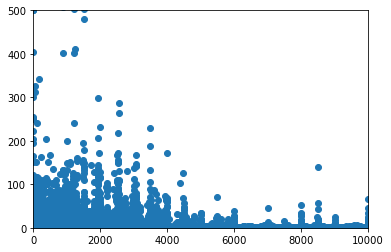

In [14]:
plt.scatter(sales['item_price'], sales['item_cnt_day'])
plt.xlim(0, 10000)
plt.ylim(0, 500)
np.corrcoef(sales['item_price'], sales['item_cnt_day'])

(array([377306., 250360., 108169.,  78238.,  44632.,  27428.,  25686.,
         11837.,  27391.,  17616.,   4968.,   7056.,   1364.,   3042.,
          1638.,    841.,    833.,    630.,    392.,    693.]),
 array([   0.,  300.,  600.,  900., 1200., 1500., 1800., 2100., 2400.,
        2700., 3000., 3300., 3600., 3900., 4200., 4500., 4800., 5100.,
        5400., 5700., 6000.]),
 <BarContainer object of 20 artists>)

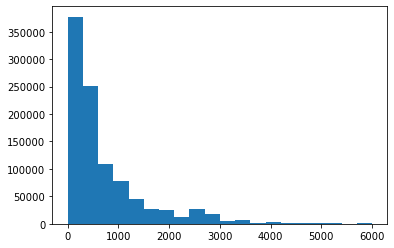

In [15]:
plt.hist(np.random.choice(sales['item_price'], 1000000), bins=20, range=[0, 6000])
#np.sort(sales['item_price']))

(array([    0.,     0.,     0.,     0., 61471.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
        46374.,     0.,     0.,     0.]),
 array([75.  , 75.25, 75.5 , 75.75, 76.  , 76.25, 76.5 , 76.75, 77.  ,
        77.25, 77.5 , 77.75, 78.  , 78.25, 78.5 , 78.75, 79.  , 79.25,
        79.5 , 79.75, 80.  ]),
 <BarContainer object of 20 artists>)

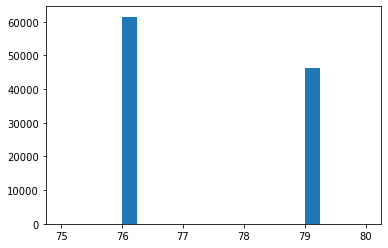

In [16]:
subdata = sales[sales['item_id'] == 100]['item_price']
plt.hist(np.random.choice(subdata, 1000000), bins=20, range=[75, 80])

In [21]:
test = pd.read_csv("test.csv")
test.head()
print(len(test))

214200


In [22]:
def predictItemCount(shop_id, item_id):
    sales_shop_item = sales[(sales["shop_id"] == shop_id) & (sales["item_id"] == item_id)]
    sold_each_month = sales_shop_item.groupby(by="date_block_num", dropna=True).sum()
    if len(sold_each_month['item_cnt_day']) == 0:
        return 0
    else:
        return sold_each_month['item_cnt_day'].iloc[-1]
        #print(sold_each_month['item_cnt_day'])
    #print(len(sold_each_month['item_cnt_day']))
    #return sold_each_month['item_cnt_day']

predictions = []
for index, row in test.iterrows():
    predictions.append(predictItemCount(row['shop_id'], row['item_id']))
    

In [23]:
test['item_cnt_month'] = predictions

In [24]:
output = test[['ID', 'item_cnt_month']]
output.to_csv(f"output.csv", index=False)